# Analisi di un DataBase

--------

Il database contiene gli ordini di un servizio di printing on demand. Gli anni presi in considerazione sono quelli che vanno dal 2015 al 2019.  
Tutti i valori sono realistici ma fittizi.

####  Importo le librerie di Python che utilizzerò per le analisi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
%matplotlib inline


###  Importo il file e creo il DataFrame

In [4]:
orders = pd.read_csv("https://raw.githubusercontent.com/rafsport/business-analysis/master/db_orders.csv", sep=';')

In [5]:
orders["cover_price"] = orders["cover_price"].str.replace(",", ".").astype(float)
orders["selling_price"] = orders["selling_price"].str.replace(",", ".").astype(float)
orders["printing_price"] = orders["printing_price"].str.replace(",", ".").astype(float)
orders["delivery_price"] = orders["delivery_price"].str.replace(",", ".").astype(float)
orders["revenues"] = orders["revenues"].str.replace(",", ".").astype(float)
orders["medium_id"] = orders["medium_id"].astype(str)

In [6]:
orders["revenues_tot"] = orders["revenues"] + orders["delivery_price"]

In [7]:
orders["order_date"] = pd.to_datetime(orders["order_date"], format='%d/%m/%Y %H:%M', dayfirst = True).dt.floor("d")
orders["weekday"] = orders["order_date"].dt.dayofweek

In [8]:
orders["firstsignin"] = pd.to_datetime(orders["firstsignin"], format='%d/%m/%Y %H:%M', dayfirst = True).dt.floor("d")
orders["firstsubscriptiontime"] = pd.to_datetime(orders["firstsubscriptiontime"], format='%d/%m/%Y %H:%M', dayfirst = True).dt.floor("d")
orders["signin"] = pd.to_datetime(orders["signin"], format='%d/%m/%Y %H:%M', dayfirst = True).dt.floor("d")
orders["signin_author"] = pd.to_datetime(orders["signin_author"], format='%d/%m/%Y %H:%M', dayfirst = True).dt.floor("d")

In [17]:
#Numero di ordini per cliente
orders['num_ords'] = orders.groupby(['client_id', 'order_id']).ngroup()
orders['num_ords'] = orders.num_ords - orders.groupby(['client_id']).num_ords.transform('min')+1


In [18]:
#Numero di giorni tra i molteplici ordini di uno stesso cliente
orders['days_bt_ord'] = (orders.order_date -orders.groupby('client_id').order_date.transform('min')).dt.days 

#Numero di giorni tra i molteplici ordini di uno stesso cliente sullo stesso libro
orders['days_bt_ord_per_medium'] = (orders.order_date - orders.groupby(['client_id', 'medium_id']).order_date.transform('min')).dt.days


Al termine delle operazioni di creazione e formattazione il DataFrame appare così:

In [14]:
orders.dtypes

order_id                          object
order_date                datetime64[ns]
client_id                         object
firstsignin               datetime64[ns]
firstsubscriptiontime     datetime64[ns]
signin                    datetime64[ns]
signin_author             datetime64[ns]
medium_id                         object
product_type                      object
characteristic                    object
size                             float64
paper                             object
cover                             object
color                             object
pages                            float64
cover_price                      float64
selling_price                    float64
printing_price                   float64
delivery_price                   float64
units                              int64
revenues                         float64
revenues_tot                     float64
weekday                            int64
num_ords                           int64
days_bt_ord     

In [16]:
orders.sample(5)

,order_id,order_date,client_id,firstsignin,firstsubscriptiontime,signin,signin_author,medium_id,product_type,characteristic,...,selling_price,printing_price,delivery_price,units,revenues,revenues_tot,weekday,num_ords,days_bt_ord,days_bt_ord_per_medium
51990,order_id - 154239,2018-07-06,client_id - 36105,2018-05-29,2018-05-29,2018-05-29,2018-06-18,medium_id - 121256,book,120.180MORCL4,...,14.0,13.06,6.97,1,15.28,22.25,4,2,18,0
49681,order_id - 152315,2018-04-16,client_id - 15722,2010-12-22,2010-12-22,2015-06-24,2016-01-08,medium_id - 119879,book,150.230MORBN4,...,16.0,9.59,7.94,4,44.88,52.82,0,16,829,0
51834,order_id - 154102,2018-06-29,client_id - 6600,2008-08-18,2008-08-18,2015-06-23,2015-06-27,medium_id - 120841,book,120.180MORCL4,...,12.5,9.88,3.62,1,11.55,15.17,4,8,1219,18
67472,order_id - 167268,2019-12-08,client_id - 30150,2014-04-17,2014-04-17,2015-07-14,2015-07-03,medium_id - 108458,book,114.172MORBN4,...,11.5,6.68,3.27,2,15.63,18.90,6,22,1609,1105
39119,order_id - 143259,2017-06-21,client_id - 28392,2014-01-28,2014-01-28,2015-06-25,2015-08-18,medium_id - 113241,book,114.172MORBN4,...,10.0,5.48,6.97,10,62.24,69.21,2,20,887,0


###  Numero di clienti unici suddivisi per mese e anno

Voglio sapere il numero di clienti che hanno fatto almeno un acquisto avendo come base temporale il mese.  
La rappresentazione grafica a tabella permette di confrontare facilmente sia i mesi di un anno specifico sia i mesi di anni diversi.

In [19]:
orders["order_year"] = orders["order_date"].dt.year
orders["order_month"] = orders["order_date"].dt.month

orders.pivot_table(values="client_id",
                   columns="order_year",
                   index="order_month",
                   aggfunc= {"client_id":"nunique"},
                   margins=False,
                   fill_value=0).round().style.background_gradient(cmap="summer")


order_year,2015,2016,2017,2018,2019
order_month,,,,,
1,867,912,768,725,713
2,768,861,632,749,659
3,1008,844,734,634,567
4,760,773,771,524,523
5,819,879,673,563,493
6,647,677,702,620,456
7,743,688,704,589,455
8,786,795,969,982,402
9,768,769,677,554,403


###  Suddivisione degli ordini fatti nel 2019 per tipologia di allestimento del libro

Voglio sapere il numero di ordini per ciascuna tipologia di allestimento. Per rappresentare efficacemente questa analisi utilizzo un grafico a barre.

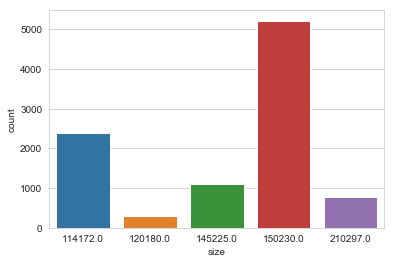

In [88]:
sns.set_style("whitegrid")
sns.countplot(data=orders[orders.order_year == 2019], 
              x="size");

###  Suddivisione degli ordini per giorno della settimana

Voglio conoscere il numero di ordini in ogni giorno della settimana.

In [20]:
weekday = pd.DataFrame(orders.groupby("weekday").order_id.nunique())
weekday.reset_index(inplace=True)
weekday.weekday.replace([[0],[1],[2],[3],[4],[5],[6]],
                        [["mon"],["tue"],["wed"],["thu"],
                         ["fri"],["sat"],["sun"]], inplace=True)

''

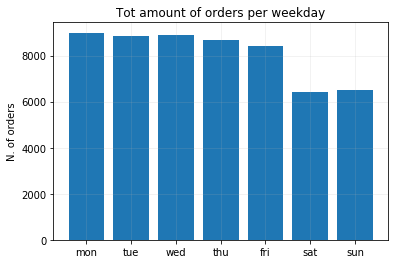

In [27]:
plt.bar(weekday.weekday,weekday.order_id)
plt.title("Tot amount of orders per weekday")
plt.ylabel("N. of orders")
plt.grid(alpha=0.2)
;

###  Misuro l'impatto degli sconti

Il servizio di *printing on demand* prevede sconti sulle quantità. Siccome la percentuale di sconto non è presente nel DataBase di partenza, ho bisogno di calcolarla come differenza tra un incasso ipotetico e l'incasso effettivo.

Calcolo l'incasso ipotetico:

In [30]:
orders["hyp_revenues"] = orders["printing_price"] * orders["units"]

Calcolo *"l'incasso tot ipotetico"*, ossia l'incasso ipotetico comprensivo delle spese di spedizione ipotetiche. Per farlo ho bisogno di applicare un valore definito alle spese di spedizione quando queste sono pari a zero (ex se quantità maggiore o uguale a 20).


In [31]:
orders["hyp_delivery_price"] = orders["delivery_price"] 

index_deliv_zero = orders[orders.delivery_price.eq(0)].index 
deliv_mean_2016 = orders[orders.order_year.isin([2016])].groupby("units").delivery_price.mean().round()
orders.loc[index_deliv_zero,"hyp_delivery_price"] = orders.loc[index_deliv_zero].set_index("units").hyp_delivery_price.replace(0,np.nan).fillna(deliv_mean_2016).values 

orders["hyp_revenues_tot"] = orders["hyp_revenues"] + orders["hyp_delivery_price"]

Definisco la funzione di sconto e la utilizzo per creare una nuova colonna di sconto:

In [32]:
def delta_perc(x, y):
    if x == 0:
        return 0
    else:
        return round(((x - y) / x * 100),0)

orders["discount"] = orders.apply(lambda row: delta_perc(row['hyp_revenues_tot'], row['revenues_tot']), axis=1)

Mettendo in relazione le unità vendute con lo sconto applicato si notano due cose:  
* esiste una relazione lineare
* ci sono molte eccezione dovute probabilmente ad una pratica scontistica che va oltre lo sconto quantità

''

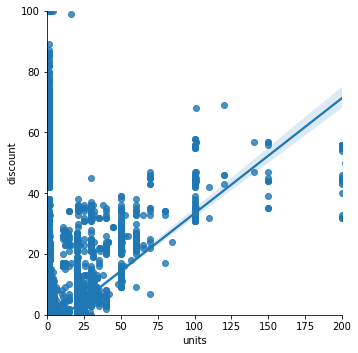

<Figure size 7200x1440 with 0 Axes>

In [40]:

sns.lmplot(data=orders[(orders.order_year == 2019)
                      &(orders.product_type == "book")], 
           x="units",
           y="discount")
plt.xlim(0,200)
plt.ylim(0,100)
plt.figure(figsize=(100, 20))
;

###  Caratteristiche degli ordini

Quanti ordini fanno i clienti? Quante unità per ciascun ordine? E qual è il fatturato generato? Rispondo a tutte queste domande aggregando i singoli ordini rispetto al numero di copie per ciascun ordine.

In [44]:
units = pd.DataFrame(orders[(orders.product_type == "book")&
                              (orders.order_year == 2019)][["units",
                                                            "client_id",
                                                            "order_id",
                                                            "delivery_price",
                                                            "revenues_tot"]].groupby(["units"]).agg({"client_id":"nunique",
                                                                                "order_id":"count",
                                                                                "delivery_price":"sum",
                                                                                "revenues_tot":"sum",}))
units.reset_index(inplace=True)

In [45]:
units.round(0).head(20).style.background_gradient(cmap="summer")

,units,client_id,order_id,delivery_price,revenues_tot
0,1,1682,4090,21129,66724
1,2,650,1066,5642,31799
2,3,493,702,4296,29192
3,4,367,489,3305,25529
4,5,485,711,4465,45041
5,6,144,168,1227,11911
6,7,76,97,742,8599
7,8,105,128,966,12612
8,9,19,21,161,2270
9,10,346,429,3269,48498


''

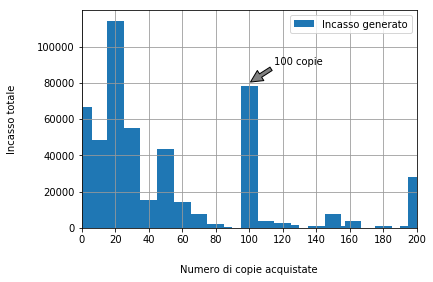

In [39]:
plt.bar(units.units, units.revenues_tot, width=10)

plt.xlim(0,200)
plt.ylim(0,120000)
plt.xticks(np.arange(0, 201, 20))
plt.yticks(np.arange(0, 120000, 20000))


plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=1)
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.4)

plt.legend(["Incasso generato"],fontsize=10)
plt.xlabel("Numero di copie acquistate",fontsize=10, labelpad=20)
plt.ylabel("Incasso totale",fontsize=10, labelpad=20)

plt.annotate(xy=[100,80000], xytext= [115,90000], fontsize=10, 
             s = "100 copie", arrowprops= dict(facecolor='grey', shrink=0.05))

;